In [67]:
import pandas as pd

In [68]:
path = 'C:\\Users\\Lenovo\\Desktop\\emin\\dataset\\aptos2019-blindness-detection\\'

In [69]:
df = pd.read_csv(path+'train.csv', sep = ',')

In [70]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


<AxesSubplot:>

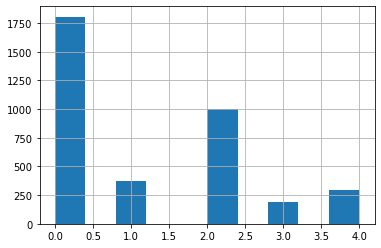

In [71]:
df['diagnosis'].hist()

In [72]:
df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [73]:
import os

In [74]:
files = os.listdir(path + 'train_images')
print(files)

['000c1434d8d7.png', '001639a390f0.png', '0024cdab0c1e.png', '002c21358ce6.png', '005b95c28852.png', '0083ee8054ee.png', '0097f532ac9f.png', '00a8624548a9.png', '00b74780d31d.png', '00cb6555d108.png', '00cc2b75cddd.png', '00e4ddff966a.png', '00f6c1be5a33.png', '0104b032c141.png', '0124dffecf29.png', '0125fbd2e791.png', '012a242ac6ff.png', '014508ccb9cb.png', '0151781fe50b.png', '0161338f53cc.png', '0180bfa26c0b.png', '0182152c50de.png', '01b3aed3ed4c.png', '01c7808d901d.png', '01d9477b1171.png', '01eb826f6467.png', '01f7bb8be950.png', '0212dd31f623.png', '022f820027b8.png', '0231642cf1c2.png', '0232dfea7547.png', '02358b47ea89.png', '0243404e8a00.png', '025a169a0bb0.png', '02685f13cefd.png', '026dcd9af143.png', '02cd34a85b24.png', '02da652c74b8.png', '02dda30d3acf.png', '0304bedad8fe.png', '0318598cfd16.png', '032d7b0b4bf6.png', '033f2b43de6d.png', '034cb07a550f.png', '03676c71ed1b.png', '0369f3efe69b.png', '03747397839f.png', '03a7f4a5786f.png', '03b373718013.png', '03c85870824c.png',

In [75]:
len(files)

3662

In [76]:
import cv2

In [77]:
img_list=[]

for i in files[0:20]:
    image = cv2.imread(path + 'train_images\\' + i)
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)

In [78]:
len(img_list)

20

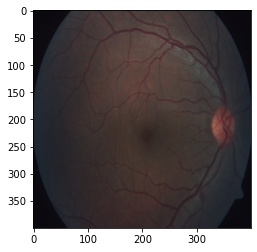

In [79]:
import matplotlib.pyplot as plt
plt.imshow(img_list[6])

In [80]:
kopya = img_list[4].copy()

In [81]:
image = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY)

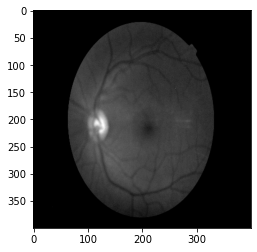

In [82]:
plt.imshow(image, cmap='gray')

In [83]:
kopya = img_list[4].copy()

In [84]:
kopya = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY)

In [85]:
blur = cv2.GaussianBlur(kopya, (5,5),10)

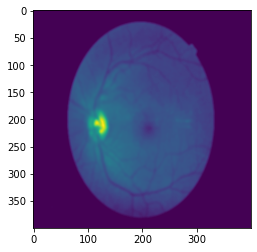

In [133]:
plt.imshow(blur)

In [87]:
thresh = cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]

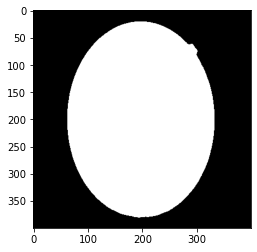

In [88]:
plt.imshow(thresh, cmap='gray')

In [89]:
kontur = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [90]:
kontur

([array([[[186,  21]],
  
         [[185,  22]],
  
         [[179,  22]],
  
         [[178,  23]],
  
         [[175,  23]],
  
         [[174,  24]],
  
         [[171,  24]],
  
         [[170,  25]],
  
         [[167,  25]],
  
         [[166,  26]],
  
         [[164,  26]],
  
         [[163,  27]],
  
         [[161,  27]],
  
         [[160,  28]],
  
         [[159,  28]],
  
         [[158,  29]],
  
         [[156,  29]],
  
         [[155,  30]],
  
         [[154,  30]],
  
         [[153,  31]],
  
         [[152,  31]],
  
         [[151,  32]],
  
         [[150,  32]],
  
         [[149,  33]],
  
         [[148,  33]],
  
         [[147,  34]],
  
         [[146,  34]],
  
         [[144,  36]],
  
         [[143,  36]],
  
         [[142,  37]],
  
         [[141,  37]],
  
         [[139,  39]],
  
         [[138,  39]],
  
         [[135,  42]],
  
         [[134,  42]],
  
         [[133,  43]],
  
         [[132,  43]],
  
         [[128,  47]],
  
         [[1

In [91]:
kontur = kontur[0][0]
kontur.shape

(459, 1, 2)

In [92]:
kontur = kontur[:,0,:]
kontur.shape

(459, 2)

In [93]:
kontur[:,0].argmax()

337

In [94]:
kontur[335]

array([331, 230], dtype=int32)

In [95]:
kontur[:,0].argmin()

111

In [96]:
kontur[111]

array([ 63, 181], dtype=int32)

In [97]:
sol = tuple(kontur[kontur[:,0].argmin()])
sag = tuple(kontur[kontur[:,0].argmax()])
ust = tuple(kontur[kontur[:,1].argmin()])
alt = tuple(kontur[kontur[:,1].argmax()])

In [98]:
sol,sag,ust,alt

((63, 181), (332, 220), (186, 21), (192, 380))

In [99]:
x1 = sol[0]
y1 = ust[1]
x2 = sag[0]
y2 = alt[1]

In [100]:
x1,x2,y1,y2

(63, 332, 21, 380)

In [101]:
orijinal = img_list[4].copy()

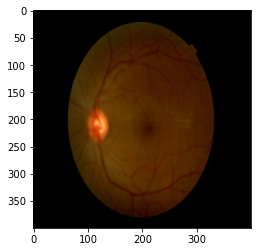

In [102]:
plt.imshow(orijinal)

In [103]:
crop_ilk = orijinal[y1:y2, x1:x2]

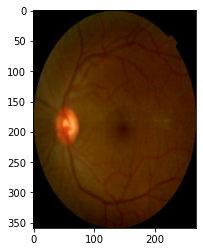

In [104]:
plt.imshow(crop_ilk)

In [105]:
crop_ilk.shape

(359, 269, 3)

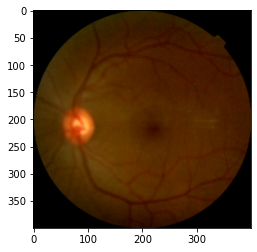

In [106]:
crop_ilk = cv2.resize(crop_ilk, (400,400))
plt.imshow(crop_ilk)

In [107]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100
x,y

(10, 17)

In [108]:
crop_son = orijinal[y1+ y : y2-y, x1 + x : x2 -x]

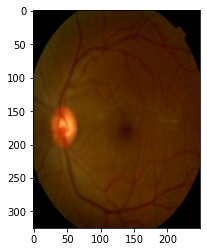

In [109]:
plt.imshow(crop_son)

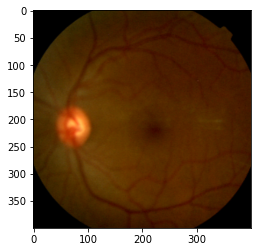

In [110]:
crop_son = cv2.resize(crop_son, (400,400))
plt.imshow(crop_son)

In [111]:
'''
LAB RENK HARITASI (CIELAB)
L = Parlaklik (siyah beyaz)
A = yesil - kirmizi
B = Mavi sari
'''
lab = cv2.cvtColor(crop_son, cv2.COLOR_RGB2LAB)

In [112]:
lab.shape

(400, 400, 3)

In [113]:
l, a, b = cv2.split(lab)

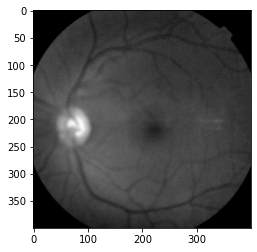

In [114]:
plt.imshow(l, cmap='gray')

In [115]:
l.shape

(400, 400)

In [116]:
duz = l.flatten()

In [117]:
duz.shape

(160000,)

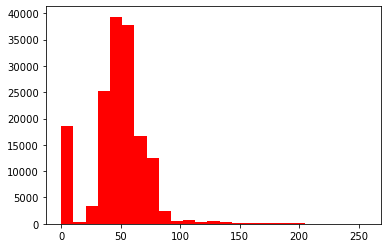

In [118]:
plt.hist(duz, 25, [0,256], color = 'r')
plt.show()

In [119]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=((8,8)))
cl = clahe.apply(l)

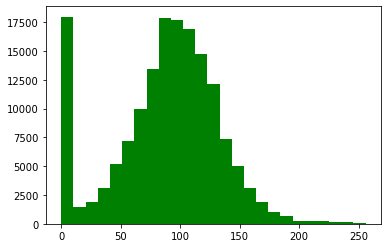

In [120]:
plt.hist(cl.flatten(), 25, [0,256], color = 'g')
plt.show()

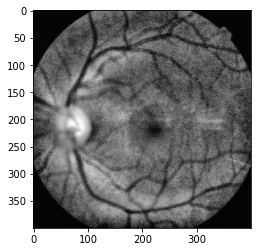

In [121]:
plt.imshow(cl, cmap='gray')

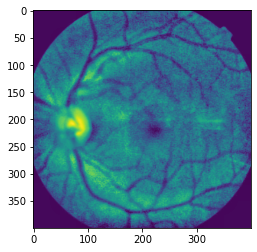

In [122]:
plt.imshow(cl)

In [123]:
limg = cv2.merge((cl, a, b))

In [124]:
son = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

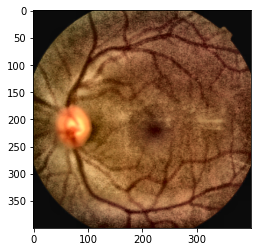

In [125]:
plt.imshow(son)

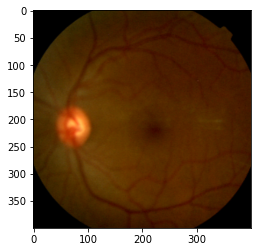

In [126]:
plt.imshow(crop_son)

In [127]:
med_son = cv2.medianBlur(son, 3) # sadece tek sayi

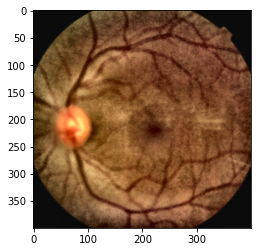

In [128]:
plt.imshow(med_son)

In [129]:
arka_plan = cv2.medianBlur(son, 37)

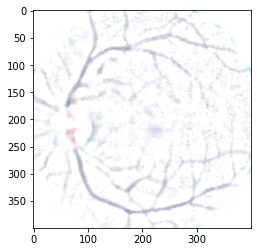

In [130]:
maske = cv2.addWeighted(med_son,1,arka_plan,-1,255)
plt.imshow(maske)

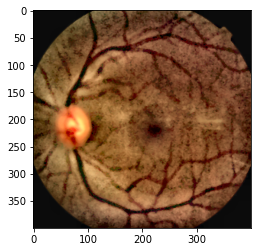

In [131]:
son_img = cv2.bitwise_and(maske, med_son)
plt.imshow(son_img)